## Data Science for Algorthmmic Trading
### Part 2

- 참고자료 : https://towardsdatascience.com/data-science-in-algorithmic-trading-d21a46d1565d

<div style="text-align: right"> Initial upload: 2020.07.27 </div>
<div style="text-align: right"> Last update: 2020.07.27 </div>

**위 참고자료의 내용을 번역, 필사하고, 일부 내용을 추가한 것이다.**    
여기서는 CAD/USD의 환율 예측이 필요한 부가데이터 IPPI를 가져와서 전처리 한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 20

### 1. Industrial Product Price Index 데이터 import  
- Part1의 USD/CAD를 예측하는데 도움이 되는 데이터를 가져온다.  
- Industrial Product Price Index(IPPI) 데이터 : [[출 처]](https://open.canada.ca/data/en/dataset/39a39c7c-24f1-4789-8f20-a04bcbf635b0)
- IPPI에 대한 설명 : [[출 처]](https://www23.statcan.gc.ca/imdb/p2SV.pl?Function=getSurvey&SDDS=2318)

재화의 가격이 상승하면 경제나 환율 지표에 영향을 미칠것이다.  
그러나 우리가 사용하는 데이터는 몇가지 제약이 있다.(일단 알고만 있자.)  
- 월별데이터만 가지고 있다.: 트레이딩에 사용하기에는 느리다. 
- 이 인덱스는 캐나다와 관련된 것인다. 따라서 USD/CAD 환율에서 미국에 대한 정보는 알기 힘들다.  
- 뉴스와 관련된 데이터는 포함하지 않았고, 다른 데이터 소스도 사용하지 않았다.  

In [2]:
df = pd.read_csv('18100030.csv')

In [3]:
df.head()

,REF_DATE,GEO,DGUID,North American Product Classification System (NAPCS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1956-01,Canada,2016A000011124,"Total, Industrial product price index (IPPI)","Index, 2010=100",184,units,0,v79309137,1.1,15.6,NaN,NaN,NaN,1
1,1956-01,Canada,2016A000011124,Energy and petroleum products [P51],"Index, 2010=100",184,units,0,v79309138,1.2,NaN,..,NaN,NaN,1
2,1956-01,Canada,2016A000011124,Natural gas liquids and related products [143],"Index, 2010=100",184,units,0,v79309139,1.3,NaN,..,NaN,NaN,1
3,1956-01,Canada,2016A000011124,"Solid fuel products, not elsewhere classified ...","Index, 2010=100",184,units,0,v79309140,1.4,NaN,..,NaN,NaN,1
4,1956-01,Canada,2016A000011124,"Refined petroleum energy products, and biofuel...","Index, 2010=100",184,units,0,v79309141,1.5,NaN,..,NaN,NaN,1


### 2. 데이터 전처리 하기  
- IPPI 세부 항목별로 지표(VALUE)를 추출한다.

분석에 사용할 컬럼을 선택한다.

In [4]:
categories = list(df[df.columns[3]].drop_duplicates())
 # 같은결과 categories = np.unique(df[df.columns[3]].values)

In [5]:
df_cols = ['REF_DATE', 'North American Product Classification System (NAPCS)', 
           'VALUE']

In [6]:
df = df[df_cols]

In [7]:
df.head()

,REF_DATE,North American Product Classification System (NAPCS),VALUE
0,1956-01,"Total, Industrial product price index (IPPI)",15.6
1,1956-01,Energy and petroleum products [P51],NaN
2,1956-01,Natural gas liquids and related products [143],NaN
3,1956-01,"Solid fuel products, not elsewhere classified ...",NaN
4,1956-01,"Refined petroleum energy products, and biofuel...",NaN


- 위의 두번째 컬럼의 내용이 세부항목이다.

그리고 빈 데이터프레임을 하나 준비한다.

In [8]:
new_df = pd.DataFrame(columns=df_cols)

기준일을 인덱스로 지정하기

In [9]:
df.index = df['REF_DATE']
new_df.index = new_df['REF_DATE']

In [10]:
df = df.drop(['REF_DATE'], axis=1)
new_df = new_df.drop(['REF_DATE'], axis=1)

In [11]:
df.head()

,North American Product Classification System (NAPCS),VALUE
REF_DATE,,
1956-01,"Total, Industrial product price index (IPPI)",15.6
1956-01,Energy and petroleum products [P51],NaN
1956-01,Natural gas liquids and related products [143],NaN
1956-01,"Solid fuel products, not elsewhere classified ...",NaN
1956-01,"Refined petroleum energy products, and biofuel...",NaN


In [12]:
new_df.head()

,North American Product Classification System (NAPCS),VALUE
REF_DATE,,


카테고리를 컬럼으로 하고 그 값을 취하는 루프를 동작시킨다.

In [13]:
for cat in categories:
    # 데이터 일부에 문제가 있으므로 모두 되지 않는다.
    try:
      new_df[cat]=df[df[list(df)[0]]==cat]['VALUE']
    except Exception as e:
      print("failed on",cat,e)

failed on Asphalt (except natural) and asphalt products cannot reindex from a duplicate axis
failed on Lubricants and other petroleum refinery products cannot reindex from a duplicate axis
failed on Prepared and packaged seafood products cannot reindex from a duplicate axis
failed on Coffee and tea cannot reindex from a duplicate axis
failed on Fresh, frozen and canned fruit and vegetable juices cannot reindex from a duplicate axis
failed on Bottled water, carbonated soft drinks, other beverages, and ice cannot reindex from a duplicate axis
failed on Tobacco products cannot reindex from a duplicate axis
failed on Clothing, footwear and accessories cannot reindex from a duplicate axis
failed on Pharmaceutical and medicinal products cannot reindex from a duplicate axis
failed on Plastic resins cannot reindex from a duplicate axis
failed on Paints, coatings and adhesive products cannot reindex from a duplicate axis
failed on Waste and scrap of plastic and rubber cannot reindex from a dupl

In [14]:
new_df.head()

,North American Product Classification System (NAPCS),VALUE,"Total, Industrial product price index (IPPI)",Energy and petroleum products [P51],Natural gas liquids and related products [143],"Solid fuel products, not elsewhere classified [144]","Refined petroleum energy products, and biofuels [261]",Coke and other coke oven products [26111],Motor gasoline [26121],"Motor gasoline, regular",...,Cut diamonds (except industrial),"Cut gems (except diamonds), jewellery findings, and metal coins and tokens",Precious metal hollowware and flatware,Costume jewellery and novelties,Musical instruments (including parts and accessories),Other miscellaneous goods,"Buttons, zippers and other notions","Brooms, mops, dusters, and brushes, and painting pads, rollers and accessories","Other miscellaneous goods, not elsewhere classified","Unrecorded optical and magnetic media, and media not elsewhere classified"
REF_DATE,,,,,,,,,,,,,,,,,,,,,
1956-01,NaN,NaN,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956-02,NaN,NaN,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956-03,NaN,NaN,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956-04,NaN,NaN,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956-05,NaN,NaN,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
new_df.shape

(773, 1914)

### 3. 결과 시각화 하기

전체 데이터 차트 그려보기

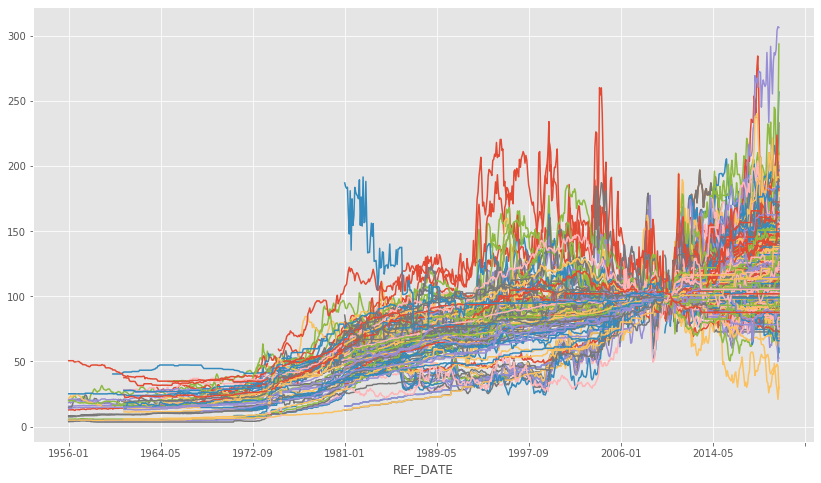

In [17]:
new_df.plot(figsize = (14, 8))
plt.legend().remove()

특정 구간만 시각화 하기

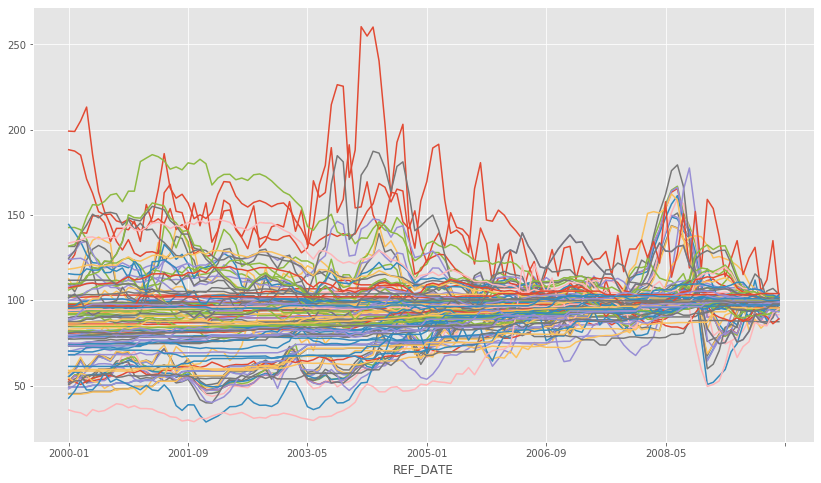

In [18]:
new_df['2000':'2010'].plot(figsize = (14, 8))
plt.legend().remove()

- 2010에 모든 항목의 인덱스가 100에 수렴했다가 이후에 퍼져나가는 것을 확인할 수가 있다.  

### 4. 데이터셋 저장하기

In [19]:
new_df.to_csv('forex_signals.csv')